In [5]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
combined_df = pd.merge(ride_df, city_df, how='left', on='city')
combined_df.head(5)


# Display the data table for preview


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [6]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


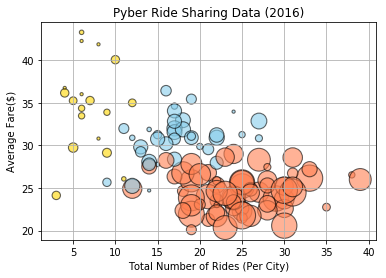

In [30]:
#group df by city and create aggregate of column headers that we need to analyze  
city_grouped = combined_df.groupby("city").agg({'fare':'mean',
                                              'ride_id':'count',
                                              'driver_count':'max',
                                                'type': 'max'
                                        
                                               })
city_grouped
#Rename the columns 
city_renamed = city_grouped.rename(columns={"fare": "Avg_Fare", "ride_id": "Rider_Count", 
                                            "driver_count": "Drivers", "type": "Type"
})

#Create color dictionary for scatter plot

color_dict = {'Urban': "coral", 
              'Suburban': "Skyblue", 
              'Rural': "gold"}
#Take the Type column and use the color dict 
city_renamed['Color'] = city_renamed['Type'].map(color_dict)
#Create scatter plot 
plt.scatter(city_renamed.Rider_Count, city_renamed.Avg_Fare, s=[city_renamed.Drivers*10],
            c=city_renamed.Color, alpha=.6, edgecolors='black', linewidth=1.1, label=city_renamed.Color)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")
plt.grid()
plt.show()

In [8]:
# Show plot
plt.show()

## Total Fares by City Type

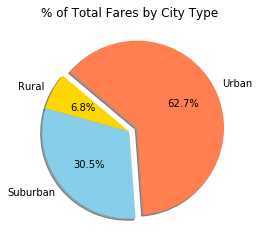

In [32]:
# Calculate Type Percents
fare_total = combined_df['fare'].sum()
labels = combined_df['type'].unique()
sort_labels = labels
explode = (0, 0, 0.1)
colors = ["gold", "Skyblue", "coral"]
type_grouped = combined_df.groupby("type").agg({'fare':'sum'
                                               })
real_group = (type_grouped/fare_total)*100
plt.pie(real_group, explode=explode, labels=sorted(labels), colors=colors, shadow=True, autopct='%.1f%%', startangle=140)
plt.title("% of Total Fares by City Type")
plt.show()

## Total Rides by City Type

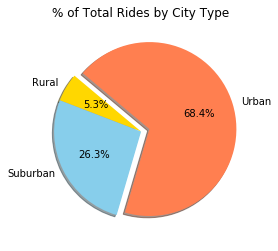

In [12]:
# Calculate Ride Percents

ride_total = combined_df['ride_id'].count()
labels = combined_df['type'].unique()
explode = (0, 0, 0.1)
colors = ["gold", "Skyblue", "coral"]
type_ride = combined_df.groupby("type").agg({'ride_id':'count'
                                               })
group = (type_ride/ride_total)*100
plt.pie(group, explode=explode, labels=sorted(labels), colors=colors, shadow=True, autopct='%.1f%%', startangle=140)
plt.title("% of Total Rides by City Type")
plt.show()


# Build Pie Chart

# Save Figure


## Total Drivers by City Type

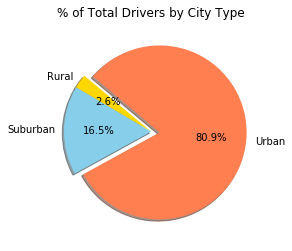

In [39]:
# Calculate Driver Percents
labels = combined_df['type'].unique()
explode = (0, 0, 0.1)
colors = ["gold", "Skyblue", "coral"]
city_pies = city_renamed.groupby("Type").agg({'Drivers':'sum',
                                              })
city_pies
city_pies['p_driver'] = round(city_pies['Drivers']/city_pies['Drivers'].sum() * 100,2)
plt.pie(city_pies['p_driver'], explode=explode, labels=sorted(labels), colors=colors, shadow=True, autopct='%.1f%%', startangle=140)
plt.title("% of Total Drivers by City Type")
plt.show()
# Build Pie Charts

# Save Figure
